 # Bike Sharing Assignment:
 
 ## Problem Statement:
 A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.The company is finding it very difficult to sustain in the current market scenario.So,it has decided to understand the factors on which the demand for these shared bikes depends.The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

## Business Goal:
We are required to model the demand for shared bikes with the available independent variables.The model will be a good way for management to understand the demand dynamics of a new market. 

## Solution Involving Steps:
The solution involves Data understanding, preparation and EDA ,Model building, Residual analysis,model evaluation & conclusion.
 

# Step 1: Import All Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load and Examine the Data

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#Load the dataset
bike_sharing_df = pd.read_csv("day.csv")

#Display the few records
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Get the shape of dataframe:(no. of rows, no.of columns)
bike_sharing_df.shape

(730, 16)

In [4]:
#Display the summary of bike sharing dataframe, including data-types and non-null counts
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# generate descriptive statistics for numerical columns
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 3: Data Quality Checks & Cleaning
* Remove unnecessary columns: 'instant' and 'dteday' variables are just attributes and do not add any value for prediction, so    drop it.
* Check for missing values and data types

In [6]:
# Check the  missing values
bike_sharing_df.isnull().sum()

#output shows no missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Check for duplicate entries
bike_sharing_df.duplicated().sum()

# output shows no duplicate entries

0

In [8]:
# Check for any negative temperature value 
negative_temps=bike_sharing_df[bike_sharing_df['temp']<0]

#print the result
# If the result is an empty dataframe, it means there are no negative temperature values
print(negative_temps)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [9]:
# check the size before drop
bike_sharing_df.shape

(730, 16)

In [10]:
# Drop 'instant' & 'dteday' columns as it does not contribute to predictions
bike_sharing_df=bike_sharing_df.drop(['instant','dteday'],axis=1)

In [11]:
# Check the shape of data frame after drop
bike_sharing_df.shape

(730, 14)

# Step 4: Visualising The Data
* While visualising the data we can plot scatter plots to check the linear relationship between the target and independent varaibles.
* We can also plot box plots for categorical variables and find out some useful insights w.r.t to the target variables. Here we can also visualise the collinearity between the target and independent varaiables also among the variables as well.
* If data frame is not mapped according to given data dictionary then map the data first then visulalize as 0 and 1 represents labels not numeric value.

# Map Categorical Variables
As per the given data dictionary below variables are not mapped in the data frame. In data frame it ois given as 0 and 1 or in digits like 1,2 3,... so if we do not map it, system will consider it as numerical value which is wrong as these represents labels and have some meaning.
* season  : season (1:spring, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2018, 1:2019)
* mnth : month ( 1 to 12)
* holiday : weather day is a holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0
* weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [12]:
#Map categorical columns to descriptive labels based on data dictionary
weather_mapping = {
    1: "Clear",
    2: "Cloudy",
    3: "Light Precipitation",
    4: "Heavy Precipitation"
}

month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
                 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 
                 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

bike_sharing_df['season']=bike_sharing_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike_sharing_df['yr']=bike_sharing_df['yr'].map({0:'2018',1:'2019'})
bike_sharing_df['mnth']=bike_sharing_df['mnth'].map(month_mapping)
bike_sharing_df['holiday']=bike_sharing_df['holiday'].map({0: 'Not a Holiday', 1: 'Holiday'})
bike_sharing_df['weekday']=bike_sharing_df['weekday'].map(weekday_mapping)
bike_sharing_df['workingday']=bike_sharing_df['workingday'].map({0: 'Not a Working Day', 1: 'Working Day'})
bike_sharing_df['workingday']=bike_sharing_df.apply(lambda row: 'Not a Working Day' if row['holiday']=='Holiday' or row['weekday'] in ['Saturday','Sunday'] else 'Working Day', axis=1)
bike_sharing_df['weathersit']=bike_sharing_df['weathersit'].map(weather_mapping)

#display the categorical data after mapping is done
bike_sharing_df[['season','yr','mnth','holiday','weekday','workingday','weathersit']].head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,Jan,Not a Holiday,Saturday,Not a Working Day,Cloudy
1,spring,2018,Jan,Not a Holiday,Sunday,Not a Working Day,Cloudy
2,spring,2018,Jan,Not a Holiday,Monday,Working Day,Clear
3,spring,2018,Jan,Not a Holiday,Tuesday,Working Day,Clear
4,spring,2018,Jan,Not a Holiday,Wednesday,Working Day,Clear
5,spring,2018,Jan,Not a Holiday,Thursday,Working Day,Clear
6,spring,2018,Jan,Not a Holiday,Friday,Working Day,Cloudy
7,spring,2018,Jan,Not a Holiday,Saturday,Not a Working Day,Cloudy
8,spring,2018,Jan,Not a Holiday,Sunday,Not a Working Day,Clear
9,spring,2018,Jan,Not a Holiday,Monday,Working Day,Clear


<Figure size 1200x800 with 0 Axes>

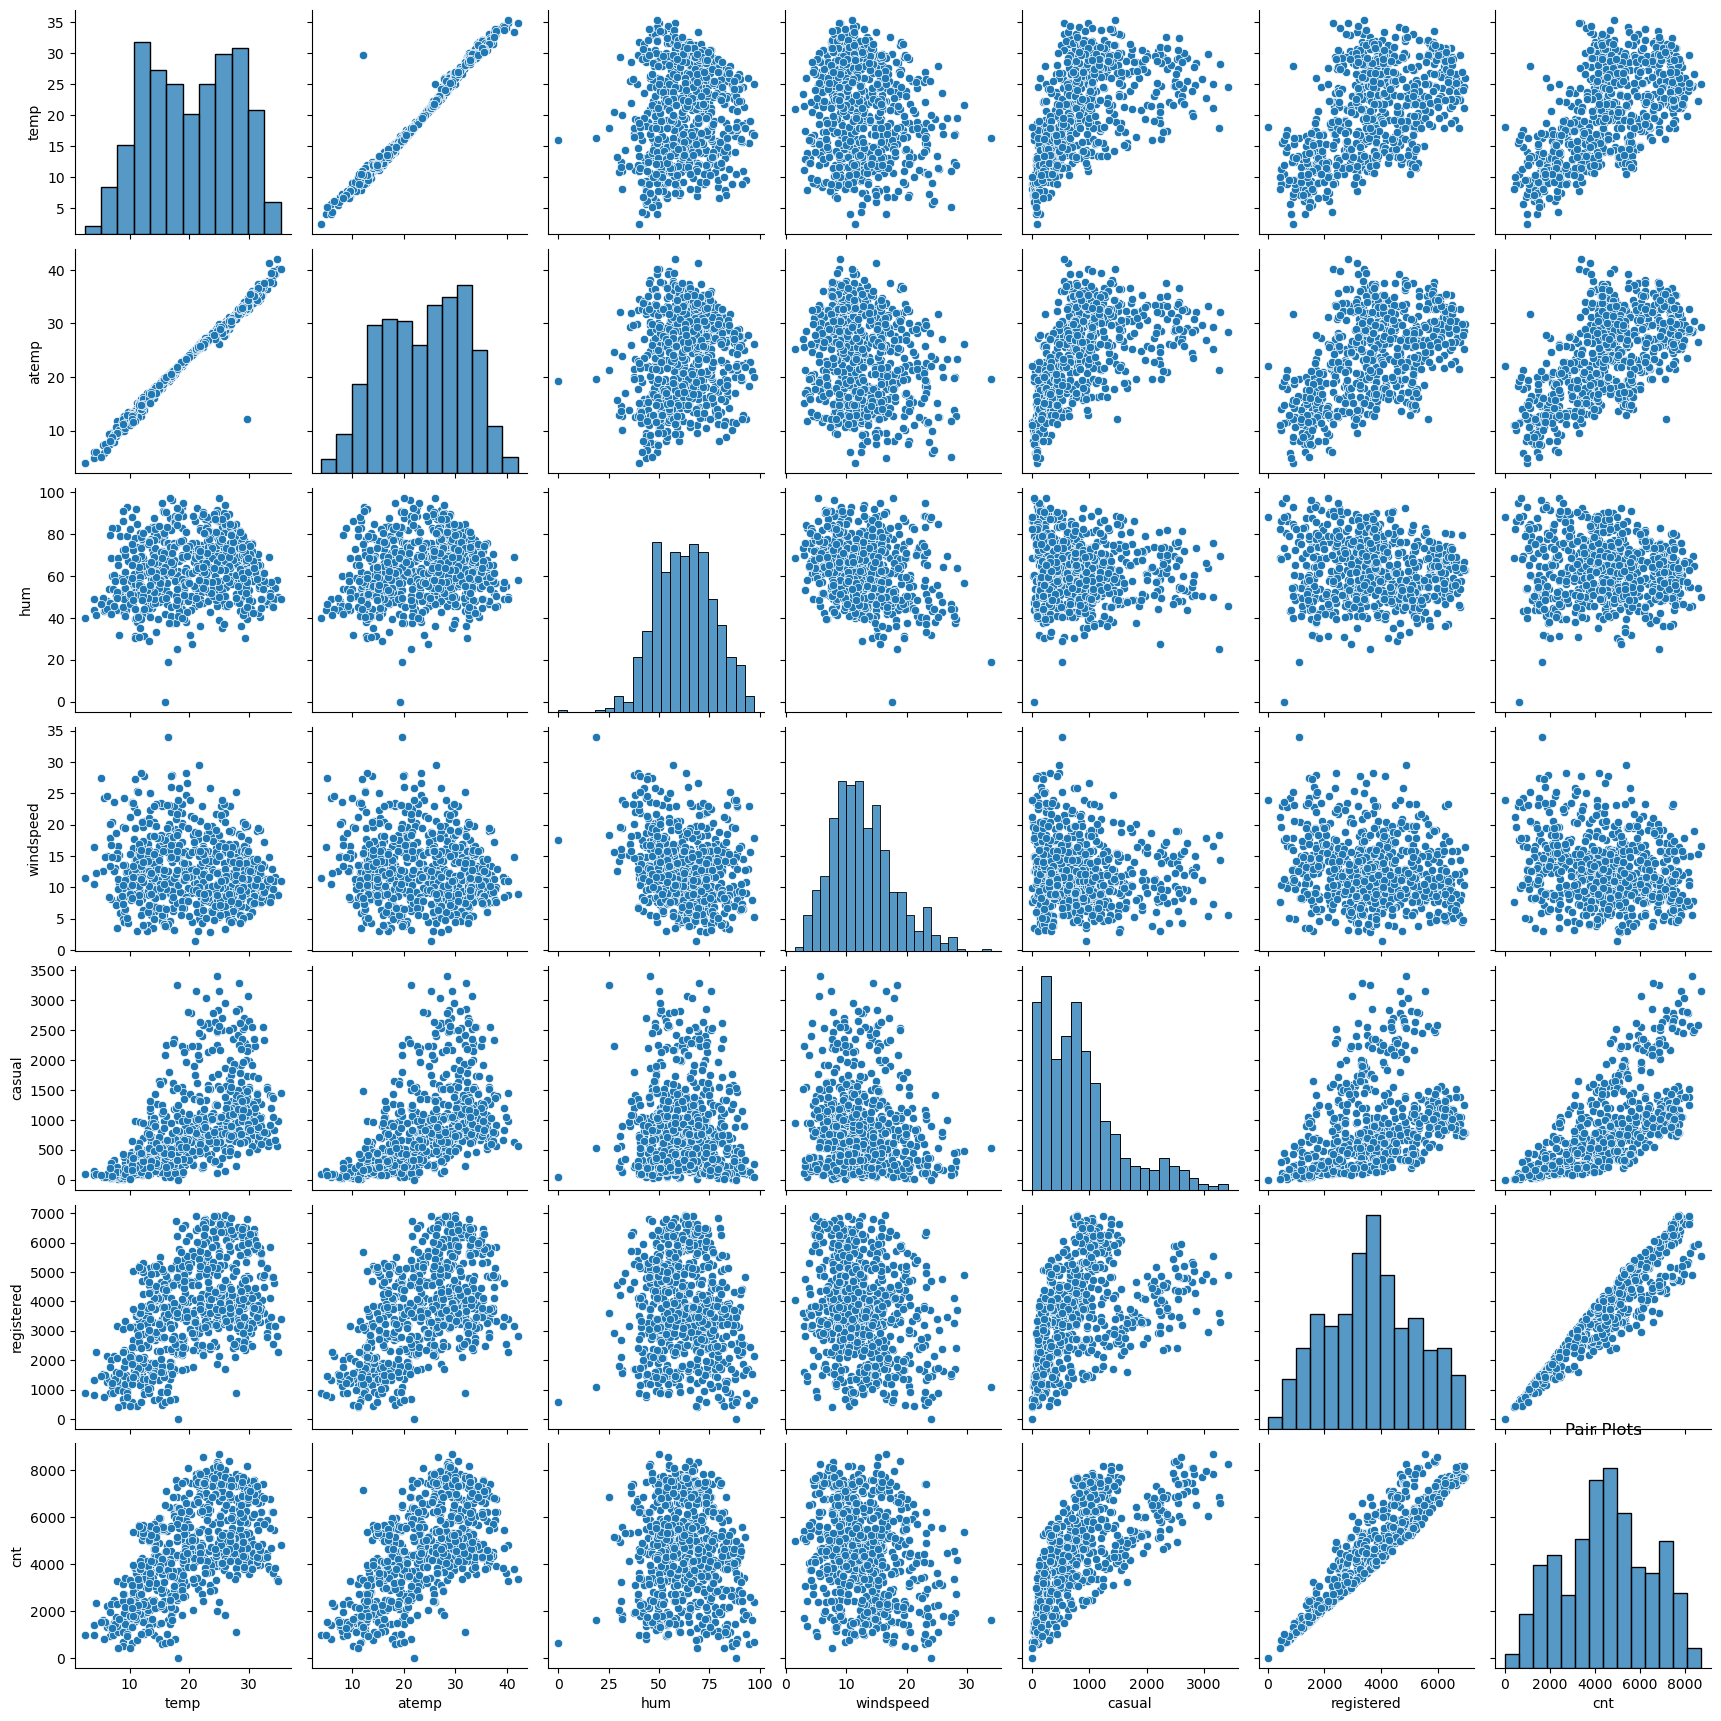

In [13]:
# Plot the pair-plot for numerical variables and analyse the plots
plt.figure(figsize=(12,8))
sns.pairplot(bike_sharing_df)
plt.title("Pair Plots")
plt.show()


# Observations and Insights of above pair-plot:
1. Temperature(temp) and Adjusted Temperature(atemp): 
* Both temp and atemp show a positive correlation with cnt(total count), meaning higher temperatures tend to be associated with higher count of bike rentals. 
* There is a strong linear relationship between temp and atemp, indicating potential multicollinearity if both variables are included in the regression model.It might be better to include only one of them  to avoid redundancy. 
2. Humidity(hum) : 
* Humidity has  a weaker, more scattered relationship with cnt, although  there appears to be a slight negative trend.This suggests that higher humidity might slightly reduce bike rentals but isn't a strong predictor.
3. Windspeed(windspeed):
* The scatter plot of windspeeed againt cnt shows no strong  linear relationship, it likely has a limited influence on bike rental counts.
4. Casual & Registered : 
* Casual and registered users both have strong positive linear relationships with cnt.This is expected, as cnt is the total count of bike rentals, including both casual and registered.
* Including both casual and regsitered might lead to multicollinearity, as cnt is derived from these two variables. It may be useful to model them independently or only use cnt directly.


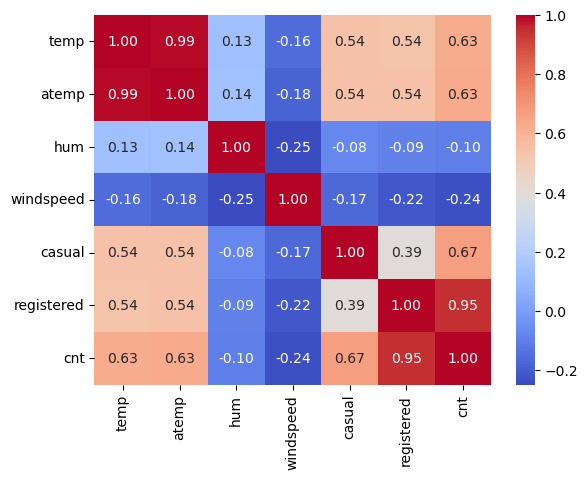

In [14]:
# We can also plot correlation matrix using heatmap to see how the variables are corelated
var_list=bike_sharing_df[['temp', 'atemp','hum','windspeed','casual','registered','cnt']]
correlation_matrix = var_list.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Observations and Insights of Correlation Matrix
* temp and atemp are highly correlated with each other and indicates multicollinearity.It might be better to include only one of them to avoid redundancy. Also both are high positive co-related with cnt varaible.
* humidity and cnt have negative co-relation and might not a good predictor.
* windspeed is also have negative  co-relation.
* Casual users are positively and have high co-relation with cnt.
* registered users have maximum positive high co-relation as cnt is derived from casual and registered users. So better approach would be to model them independently or only use cnt directly.


# Visualizing Box Plots for Categorical Variables
* Identify the categorical variables
* Plot cnt as y-axis(dependent variable)
* Plot other categorical variables as x-axis(independent variables)

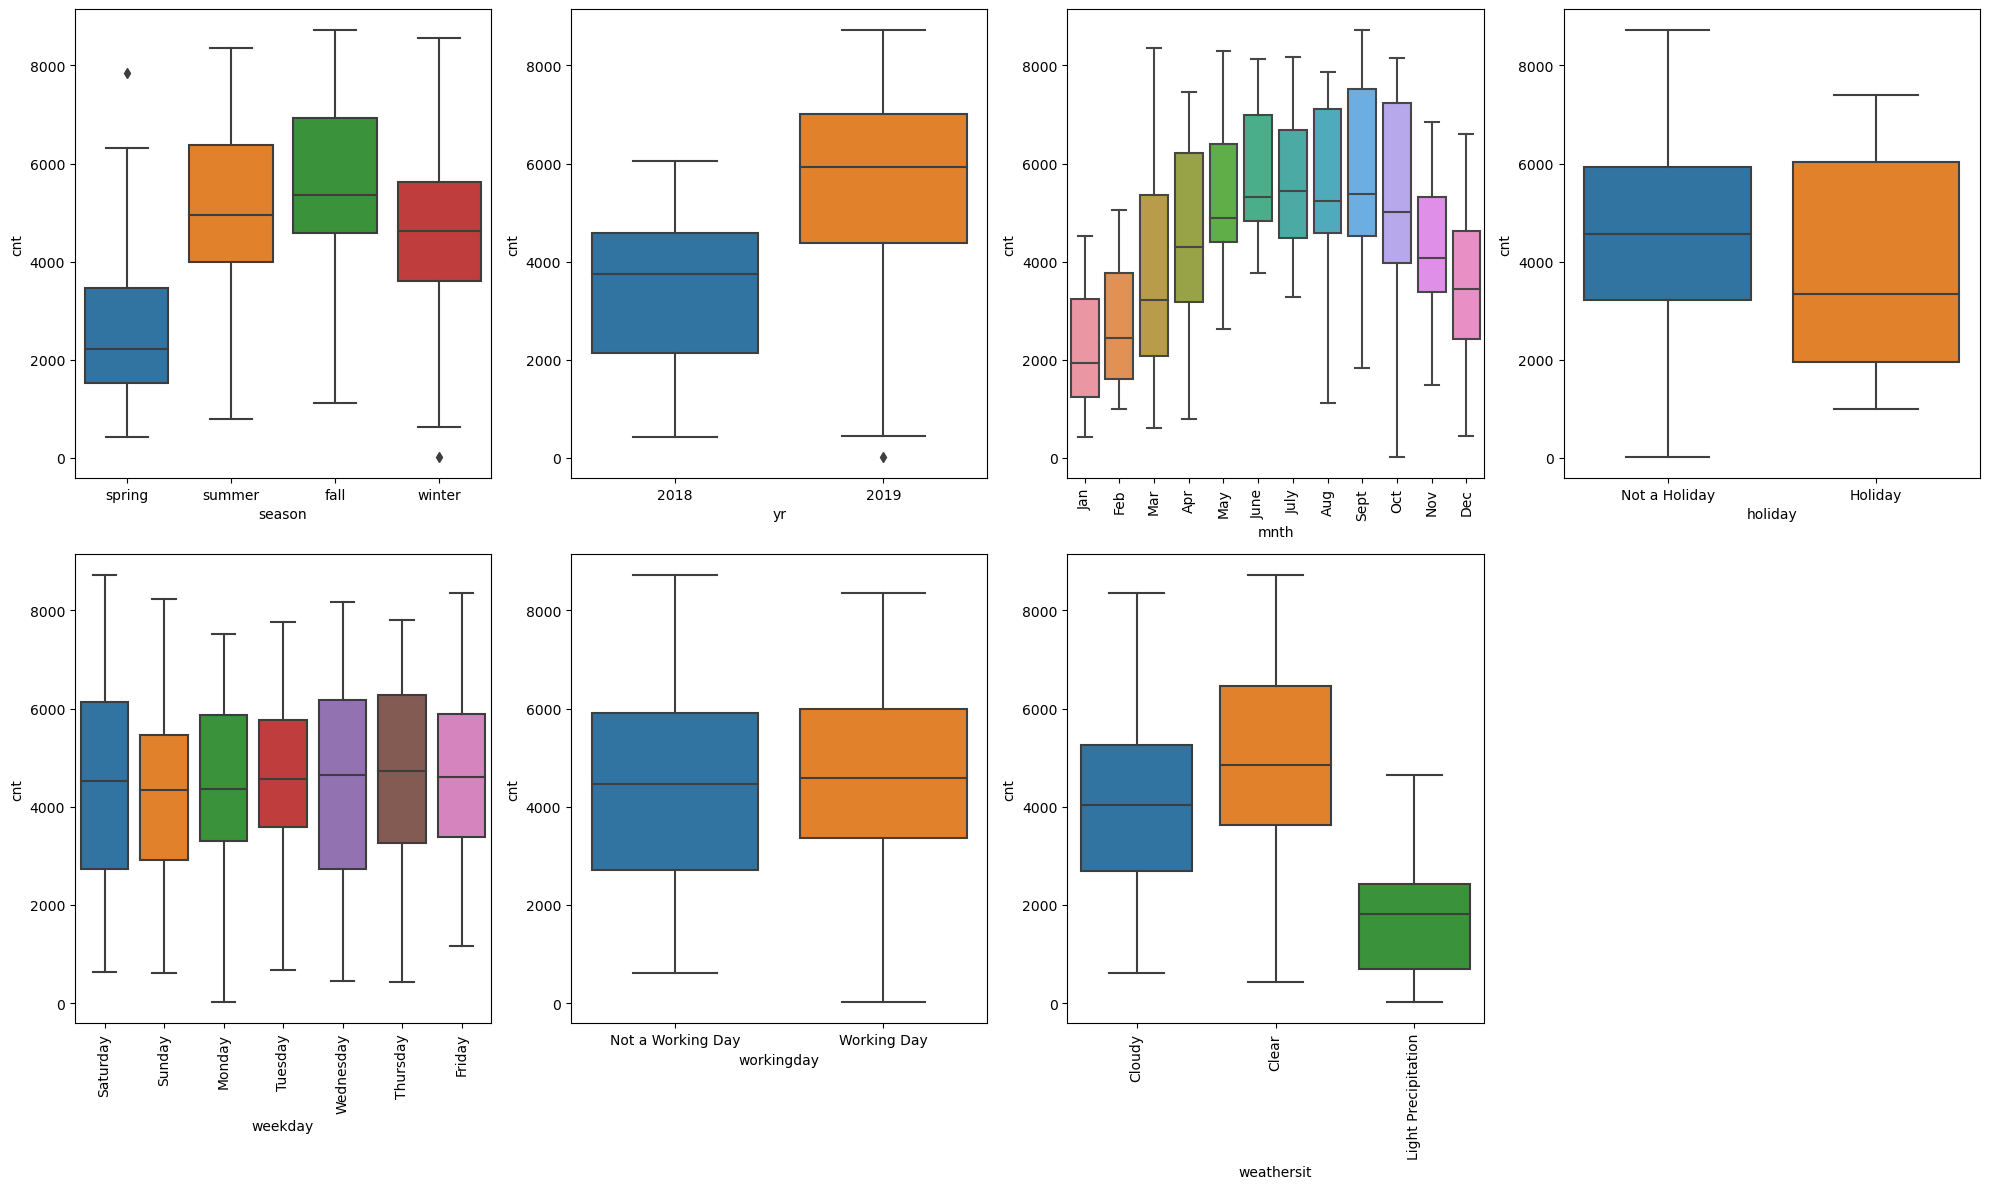

In [15]:
#visualizing categorical variables
plt.figure(figsize=(20,12))
# 'season'
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bike_sharing_df)
#plt.title('Season')

# 'yr'
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=bike_sharing_df)
#plt.title('Year')

# 'mnth'
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt',data=bike_sharing_df)
plt.xticks(rotation=90)
#plt.title('Months')

#holiday
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=bike_sharing_df)
#plt.title('Holiday')

#weekday
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=bike_sharing_df)
plt.xticks(rotation=90)
#plt.title('Weekday')

#workingday
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=bike_sharing_df)
#plt.title('Working Day')

#weathersit
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing_df)
plt.xticks(rotation=90)
#plt.title('Weather Situation')

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.tight_layout()

# Observations & Insights of categorical Variables
* Season(season): Among all four season,in fall season the bike sharing count is most followed by in summer as compare to other seasons.
* Year(yr): The median value of 2019 is highest and also the bike count in 2019 is maximum.
* Month(mnth) : If we see the trend of median values, generally in summer season i.e, july, august, september months, it is high. In July it is most. The bike sharing count is maximum in september month. Lowest bike rental count is for month 10 i.e. October.
* Median and highest bike rental count is for no holiday days marked with Not a Holiday.
* Bike rental median for all days are almost close to each other.
* Bike rental median for working/non-working days are almost close to each other.
* Bike rental median is highest for weathersit 2. Also maximum bike rental count is for weathersit 2 and lowest is for weathersit 3

Outcome:
* season,year,month & weather conditions are strong predictor 
* Holiday is a moderate predictor
* Weekday and Working Day are weak predictor

# Step 4: Data Preparation To Build Model
* Encoding the categorical variables: Converting binary variables to 1/0 
                                       & Other Categorical variables to dummy variable
* Splitting the data into train and test data sets
* Rescalling of variables(if required)

# Converting Binary Variables to 1/0
* yr : year (2018: 0, 2019:1)
* holiday : weather day is a holiday or not (Not a Holiday:0,Holiday:1)
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0( Not a Working Day:0,Working Day:1)

In [16]:
# Binary Encoding
bike_sharing_df['yr']=bike_sharing_df['yr'].map({'2018':0,'2019':1})
bike_sharing_df['holiday']=bike_sharing_df['holiday'].map({'Not a Holiday':0,'Holiday':1})
bike_sharing_df['workingday']=bike_sharing_df['workingday'].map({'Not a Working Day':0,'Working Day':1})
bike_sharing_df[['yr','holiday','workingday']].head()


,yr,holiday,workingday
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,1


# Categorical Variables (Convert to dummy variables)
* season : season (spring:1, summer:2, fall:3, winter:4)
* mnth: mnth(1 to 12)
* weekday: weekday(Sunday:0, 1: Monday:1, ..., Saturday:6)
* weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [17]:
# Create dummy variables for 'season', 'mnth', 'weekday' & 'weathersit' categorical variables
# It will create new binary 0/1 for each category
# Setting drop_first=True , will drop the first column and avoids multicollinearity
# Leaving n-1 columns for each variable with n categories
season_dummy_var= pd.get_dummies(bike_sharing_df['season'],drop_first=True)


In [18]:
season_dummy_var= season_dummy_var.astype(int)

In [19]:
season_dummy_var.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# Create dummy variables for 'mnth' varaiable

month_dummy_var =pd.get_dummies(bike_sharing_df['mnth'],drop_first=True)
month_dummy_var=month_dummy_var.astype(int)
month_dummy_var.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [21]:
# Create dummy variables for 'weekday' varaiable

weekday_dummy_var =pd.get_dummies(bike_sharing_df['weekday'],drop_first=True)
weekday_dummy_var=weekday_dummy_var.astype(int)
weekday_dummy_var.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [22]:
# Create dummy variables for 'weathersit' varaiable

weathersit_dummy_var =pd.get_dummies(bike_sharing_df['weathersit'],drop_first=True)
weathersit_dummy_var=weathersit_dummy_var.astype(int)
weathersit_dummy_var.head()

,Cloudy,Light Precipitation
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [23]:
# concat the dummy variables with the original data frame
bike_sharing_df = pd.concat([bike_sharing_df,season_dummy_var,month_dummy_var,weekday_dummy_var,weathersit_dummy_var],axis=1)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Precipitation
0,spring,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,spring,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
# Now all the dummy variables have all information, so we need to drop the variables 'season','mnth',weathersit','weekday' for which we created dummy varaiables.
# Also drop registered and casual variables as both information are present in cnt target variable

bike_sharing_df = bike_sharing_df.drop(['season','mnth','weekday','weathersit','casual','registered'],axis=1)


In [25]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Precipitation
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# check the shape after drop
bike_sharing_df.shape

(730, 30)

# Spliting the data set into Train and Test 

* import the necessary library , here I am using sklearn library
* Also I am spliting the data into training and test i.e, 70% training and 30% test

In [27]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
df_train, df_test = train_test_split(bike_sharing_df,train_size=0.7,random_state=100)


In [29]:
df_train.shape

(510, 30)

In [30]:
df_test.shape

(220, 30)

# Rescaling the features
* As scaling does not impact our model so we will rescale the variables so that they have a comparable scale.
* We can only scale on numerical variables notb on the encoded variables.
* For rescaling we will use MinMaxScaler

In [31]:
#Instantiate an object
scaler= MinMaxScaler()

In [32]:
# Create a list of numerical variables
num_var =['temp','atemp','hum','windspeed','cnt']

In [33]:
# fit on training data , here we are doing fit and then transform on the training data set
df_train[num_var] =scaler.fit_transform(df_train[num_var])

In [34]:
# verify the data after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Precipitation
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [35]:
# Verify the values are between 0 & 1
df_train[num_var].describe()

# here in the output maximum value is 1 for all variable and min value is 0 for all ,suggesting values are between 0 & 1

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 5 : Training the model


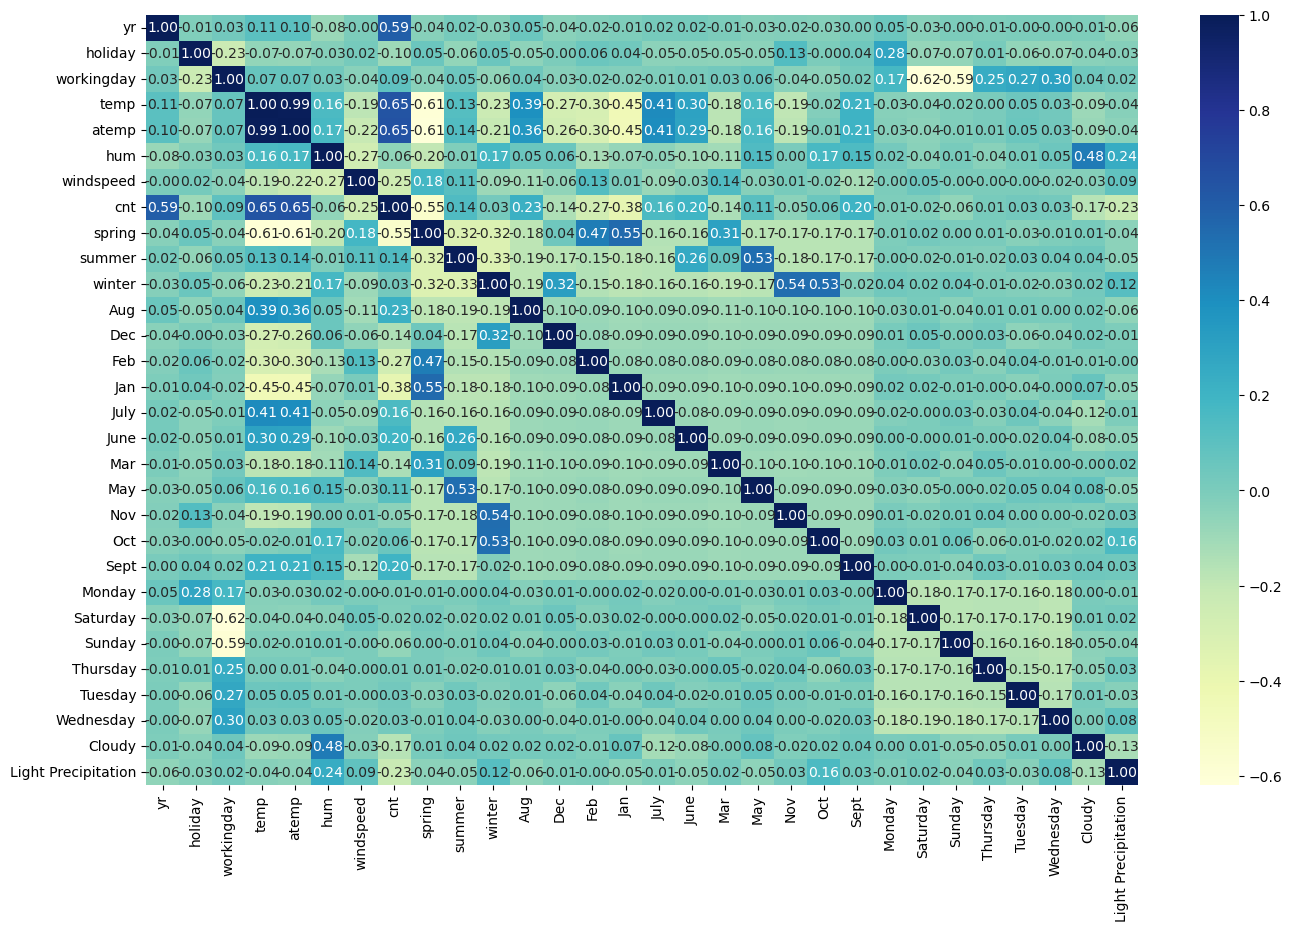

In [36]:
# heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,fmt=".2f", cmap="YlGnBu")
plt.show()

# Observation and insight:

* check the variable which is most correlated with cnt 
* also check which all varaibles are correlated with each other
Outcome:
* temp and atemp is mostly correlated with cnt and also there is mutlicolinearity between temp and atemp.
* After that year variable is in correlation with cnt.
* There are few varaiables also which have very less correlation like   

In [37]:
# Create X ,y
# X_train, y_train
# Extract only 'cnt' target variable from X & assign to y_train
y_train = df_train.pop('cnt')

# Assign training data frame(df_train) to X_train after poping out 'cnt' variable from it
X_train =df_train

# check the X_train training data
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Precipitation
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Building Model(Automation approach)
This time, we will be using the LinearRegression fucntion from scikit Learn for its compatibility with RFE(which is a utility from sklearn)
* RFE( Recursive Feature Elumination)

In [38]:
# import RFE & LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the varaible equal to 18

#Initialize linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

#running RFE
rfe = RFE(estimator=lm,n_features_to_select=18)
# Fit rfe on training set
rfe = rfe.fit(X_train,y_train)

#list down the supported features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 12),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sept', True, 1),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', False, 5),
 ('Thursday', False, 8),
 ('Tuesday', False, 7),
 ('Wednesday', False, 9),
 ('Cloudy', True, 1),
 ('Light Precipitation', True, 1)]

In [40]:
# Select those features which RFE has suggested

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Feb', 'Jan', 'July', 'Nov', 'Sept',
       'Saturday', 'Cloudy', 'Light Precipitation'],
      dtype='object')

In [41]:
# Display those features which are rejected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'June', 'Mar', 'May', 'Oct', 'Monday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
# Import statsmodel.api to get the detailed statistics
import statsmodels.api as sm

In [44]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [46]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          9.80e-190
Time:                        14:15:01   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2868    

# In OLS Regression Results, we can see R-squared is 85.1% and Adjusted R-squared is 84.6% which is good. If we consider the significane level of 5% i.e, 0.05 . So here p-value of Feb is 0.119, it is very high and insignificant with other varaiables so we can drop it. But for better clarity we will check the VIF value so that we can take best decision.

# Checking VIF(Variance Inflation Factor)
VIF is a measure of multicollinearity in a set of multiple regression variables.
* VIF=1/1-R2 , where R-squared value is obtained by regressing the i-th predictor against all other predictors.
* VIF>5 -> High collinearity and needs attention


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calcuation_of_VIF(col,X_train):
    
    vif = pd.DataFrame()
    vif['Features']= col
    vif['VIF']= [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

vif_values = calcuation_of_VIF(col, X_train)
print(vif_values)

               Features    VIF
4                   hum  31.71
3                  temp  19.75
6                spring   5.61
2            workingday   5.38
5             windspeed   4.79
8                winter   4.12
7                summer   2.89
11                  Jan   2.40
16               Cloudy   2.33
0                    yr   2.10
15             Saturday   2.00
10                  Feb   1.92
13                  Nov   1.88
9                   Dec   1.70
12                 July   1.60
14                 Sept   1.42
17  Light Precipitation   1.28
1               holiday   1.21


# Here humidity,temp,spring,workingday having high VIF value. Also we saw p-value of Feb was too high but here VIF value is low. so now, we have both p-values and VIF so we can decide which variables to drop.

* If we see for Feb month, p-value is 0.119 and vif value is 1.92 and humidity have highest VIF value but p-value is zero.
* so question here is, which variable we should drop first?
* This is a case of High-low : high p, low VIF --> Feb
                              and low p , high VIF  --> humidity
* so we first drop the variable having high p-value then we will create another model and check whether for humidity VIF value decrease or not.

# Model 2

In [48]:
# As decided, we will drop high p-value variable i.e, Feb
X_train_new = X_train[col].drop(['Feb'],axis=1)

In [49]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [50]:
# Running 2nd linear model
lm2 = sm.OLS(y_train,X_train_lm)

In [51]:
# fit
lm2 = lm2.fit()


In [52]:
# Summary of 2nd model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          2.52e-190
Time:                        14:15:02   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2756    

In [53]:
# Calcuation of VIF
calcuation_of_VIF(X_train_new.columns, X_train_new)

,Features,VIF
4,hum,31.11
3,temp,19.14
2,workingday,5.37
5,windspeed,4.78
6,spring,4.57
8,winter,4.12
7,summer,2.89
15,Cloudy,2.32
0,yr,2.09
14,Saturday,2.00


After dropping Feb variable, still there is not much decrement in the VIF value of humidity 31.11(previously it was 31.71). So now drop humidity 

In [54]:
print(X_train_new.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'Saturday',
       'Cloudy', 'Light Precipitation'],
      dtype='object')


# Model 3

In [55]:
# drop 'hum' variable 
X_train_new = X_train_new.drop(['hum'],axis=1)

In [56]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [57]:
# Running 3rd linear model
lm3 = sm.OLS(y_train,X_train_lm)

In [58]:
# fit
lm3 = lm3.fit()

In [59]:
# Summary of 3rd model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          4.83e-188
Time:                        14:15:02   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2040    

In [60]:
# Calcuation of VIF
calcuation_of_VIF(X_train_new.columns, X_train_new)

,Features,VIF
3,temp,7.21
2,workingday,5.34
4,windspeed,4.72
5,spring,3.17
7,winter,3.04
6,summer,2.34
0,yr,2.08
13,Saturday,1.99
11,Nov,1.83
9,Jan,1.68


All p-values looks fine as of now, we will drop one by one those variables having high VIF value. Here temp has highest. so we will drop it and build the model

In [61]:
print(X_train_new.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'Saturday', 'Cloudy',
       'Light Precipitation'],
      dtype='object')


# Model 4

In [62]:
# drop 'temp' variable 
X_train_new = X_train_new.drop(['temp'],axis=1)

In [63]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [64]:
# Running 4th linear model
lm4 = sm.OLS(y_train,X_train_lm)

In [65]:
# fit
lm4 = lm4.fit()

In [66]:
# Summary of 4th model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          8.58e-161
Time:                        14:15:02   Log-Likelihood:                 447.19
No. Observations:                 510   AIC:                            -862.4
Df Residuals:                     494   BIC:                            -794.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5509    

# From above regression result, we find that holiday, winter, July having very high p-values. In which july has maximum i.e, .449

In [67]:
# Calcuation of VIF
calcuation_of_VIF(X_train_new.columns, X_train_new)

,Features,VIF
3,windspeed,4.31
2,workingday,3.85
4,spring,3.08
6,winter,3.03
5,summer,2.29
0,yr,1.91
10,Nov,1.81
12,Saturday,1.70
8,Jan,1.64
13,Cloudy,1.57


# All the variable having VIF value under 5 so it is fine and we have decided to drop July as it has high p-value

In [68]:
print(X_train_new.columns)

Index(['yr', 'holiday', 'workingday', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'Saturday', 'Cloudy',
       'Light Precipitation'],
      dtype='object')


# Model 5

In [69]:
# drop 'temp' variable 
X_train_new = X_train_new.drop(['July'],axis=1)

In [70]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [71]:
# Running 5th linear model
lm5 = sm.OLS(y_train,X_train_lm)

In [72]:
# fit
lm5 = lm5.fit()

In [73]:
# Summary of 5th model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          9.48e-162
Time:                        14:15:02   Log-Likelihood:                 446.90
No. Observations:                 510   AIC:                            -863.8
Df Residuals:                     495   BIC:                            -800.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5448    

# Here winter having highest p-value i.e, 0.380

In [74]:
# Calcuation of VIF
calcuation_of_VIF(X_train_new.columns, X_train_new)

,Features,VIF
3,windspeed,4.15
2,workingday,3.55
6,winter,2.85
4,spring,2.80
5,summer,2.02
0,yr,1.89
9,Nov,1.80
8,Jan,1.64
11,Saturday,1.63
12,Cloudy,1.57


 VIF values for all variable is under 5,so we have decided to drop highest p-value variable.

In [75]:
print(X_train_new.columns)

Index(['yr', 'holiday', 'workingday', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Nov', 'Sept', 'Saturday', 'Cloudy',
       'Light Precipitation'],
      dtype='object')


# Model 6

In [76]:
# drop 'winter' variable 
X_train_new = X_train_new.drop(['winter'],axis=1)

In [77]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [78]:
# Running 6th linear model
lm6 = sm.OLS(y_train,X_train_lm)

In [79]:
# fit
lm6 = lm6.fit()

In [80]:
# Summary of 6th model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.5
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.11e-162
Time:                        14:15:02   Log-Likelihood:                 446.50
No. Observations:                 510   AIC:                            -865.0
Df Residuals:                     496   BIC:                            -805.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5401    

# From above we find that holiday have maximum p-value i.e, 0.191

In [81]:
# Calcuation of VIF
calcuation_of_VIF(X_train_new.columns, X_train_new)

,Features,VIF
3,windspeed,4.00
2,workingday,3.44
4,spring,2.40
0,yr,1.88
5,summer,1.80
7,Jan,1.63
10,Saturday,1.60
11,Cloudy,1.54
8,Nov,1.27
9,Sept,1.23


# All variables VIF value is under 5 so it is fine and we will drop holiday as it has high p-value

In [82]:
print(X_train_new.columns)

Index(['yr', 'holiday', 'workingday', 'windspeed', 'spring', 'summer', 'Dec',
       'Jan', 'Nov', 'Sept', 'Saturday', 'Cloudy', 'Light Precipitation'],
      dtype='object')


# Model 7

In [83]:
# drop 'holiday' variable 
X_train_new = X_train_new.drop(['holiday'],axis=1)

In [84]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [85]:
# Running 7th linear model
lm7 = sm.OLS(y_train,X_train_lm)

In [86]:
# fit
lm7 = lm7.fit()

In [87]:
# Summary of 7th model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          2.00e-163
Time:                        14:15:02   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5348    

# All p-values looks good 

In [88]:
# Calcuation of VIF
calcuation_of_VIF(X_train_new.columns, X_train_new)

,Features,VIF
2,windspeed,3.92
1,workingday,3.21
3,spring,2.38
0,yr,1.87
4,summer,1.79
6,Jan,1.63
9,Saturday,1.54
10,Cloudy,1.54
7,Nov,1.22
8,Sept,1.20


# From above VIF values result, it is clear that all the reamining varaibles having VIF value under the threshold value of 5 and is an acceptable range.

In [89]:
print(X_train_new.columns)

Index(['yr', 'workingday', 'windspeed', 'spring', 'summer', 'Dec', 'Jan',
       'Nov', 'Sept', 'Saturday', 'Cloudy', 'Light Precipitation'],
      dtype='object')


# Outcome:
* Model 7 is our final model
* R-squared value is 0.797  i.e, 79.7% close to 80%
* Adj. R-squared value is 0.792 i.e, 79.2%
* All p-values is below 0.005
* All VIFs value is under 5

# Residual Analysis of Training Data Set
* Before making the predictions, we need to be certain that the model is reliable. 
* For that we need to perform first residual analysis of the error terms.
* we need to check if the error terms are also normally distributed(It is one of the assumptions that needs to be fulfilled)

In [90]:
y_train_cnt = lm7.predict(X_train_lm)

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
np.sqrt(mean_squared_error(y_train,y_train_cnt))

0.10099327504031308

In [93]:
%matplotlib inline

Text(0.5, 0, 'Errors')

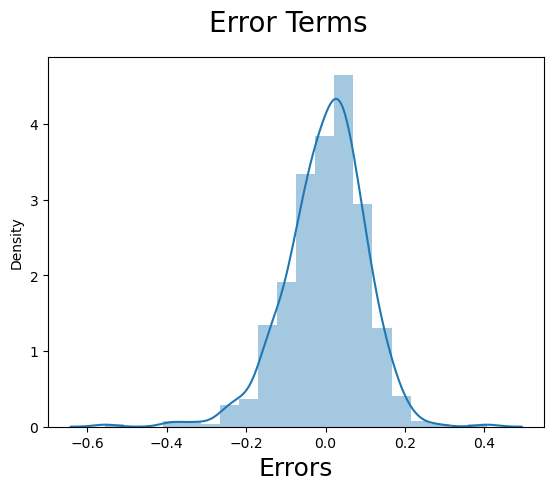

In [94]:
# Plot the histogram for error terms
fig = plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

# Coclusion:
* Based on above plot, it seems our residuals are approximately normally distributed, fulfilling the normality assumption for error terms in linear regression.

# Check for patterns in Residual

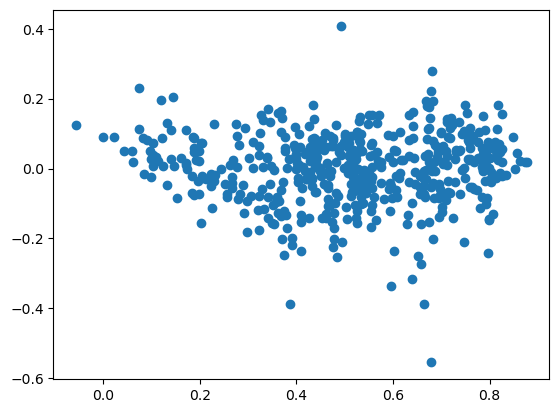

In [95]:
# plot y_train and y_train_cnt to understand the spread
plt.scatter(y_train_cnt,(y_train-y_train_cnt))
plt.show()


# Pattern observation
* The randomness and lack of patterns in this residual plot indicate that our model is likely a good fit for the data.This residual pattern suggests that the model's ability to predict is not just by chance.
* Since there is no systematic structure in the residuals, our model is likely capturing the key relationships in the data rather than fitting random noise.

# Step 6: Predictions & evaluation on the test set

# Rescaling the test data set

In [96]:
num_var =['temp','atemp','hum','windspeed','cnt']
df_test[num_var] = scaler.transform(df_test[num_var])

In [97]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Precipitation
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


# Dividing into X_test & y_test

In [98]:
y_test = df_test.pop('cnt')
X_test = df_test

In [99]:
#Now let's use our model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new =X_test[X_train_new.columns]

In [100]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [101]:
# making predictions
#y_pred is the variable containing the predicted values of the target variable on the test set
y_pred = lm7.predict(X_test_new)

Text(0, 0.5, 'y_pred')

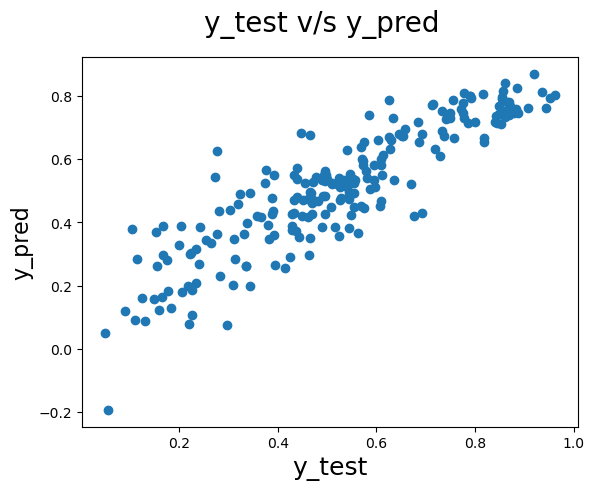

In [102]:
# Model Evaluation

# Plotting y_test & y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test v/s y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

# We draw the conclusion from above plot is that model performance is very similar

# Check RMSE value

In [103]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.10133592964010062

# Since the training RMSE (0.10099) is very close to the test RMSE (0.1013), it suggests that the model is performing consistently on both the training and test datasets.

In [104]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, y_pred)
R2

0.7852321368887245

In [105]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2

0.7727213875812715

In [106]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          2.00e-163
Time:                        14:15:03   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5348    

# Conclusion on test and training set
* The OLS summary’s R² (0.797) and adjusted R² (0.792) are close to the manually calculated test set R² (0.785) and adjusted R² (0.7727). This consistency across training and test datasets suggests that the model has a good generalization capability and is likely capturing the underlying patterns in the data well.

In [107]:
conclusion_df = pd.DataFrame({"Performance Metrics":["R-Squared","Adjusted R-Squared","RMSE"],
                             "Train Set":[0.797,0.792,0.1009],
                             "Test Set":[0.785,0.772,0.1013]})

In [108]:
conclusion_df

,Performance Metrics,Train Set,Test Set
0,R-Squared,0.7970,0.7850
1,Adjusted R-Squared,0.7920,0.7720
2,RMSE,0.1009,0.1013


* The model exhibits good performance, with minimal differences between the training and test sets across all metrics (R², adjusted R², and RMSE). 
* This consistency suggests that the model generalizes well and is likely capturing the underlying patterns in the data rather than noise.

# Variables that are significant in predicting the demand for shared bikes:
* yr
* workingday
* windspeed
* spring
* summer
* Dec
* Jan
* Nov
* Sept 
* Saturday
* Cloudy
* Light Precipitation

All these factors are significant in predicting the demand for shared bikes and management should consider these factors to rise in the demand